In [1]:
import pandas as pd
import numpy as np
from surprise import Dataset

In [2]:
df_title= pd.read_csv('Movie_Id_Titles')
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [3]:
movielens = Dataset.load_builtin('ml-100k')
movielens = pd.DataFrame(movielens.raw_ratings, columns = ['user_id', 'item_id', 'rating', 'timestamps'])
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     100000 non-null  object 
 1   item_id     100000 non-null  object 
 2   rating      100000 non-null  float64
 3   timestamps  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [4]:
movielens[['user_id', 'item_id', 'rating']] = movielens[['user_id', 'item_id', 'rating']].astype('int64')
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   item_id     100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamps  100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [5]:
movielens = pd.merge(movielens, df_title, on = 'item_id')

In [6]:
movielens.sort_values(by= 'item_id')

,user_id,item_id,rating,timestamps,title
3732,805,1,4,881695527,Toy Story (1995)
3759,124,1,3,890287733,Toy Story (1995)
3760,882,1,5,879864558,Toy Story (1995)
3761,779,1,4,875501555,Toy Story (1995)
3762,542,1,4,886532534,Toy Story (1995)
...,...,...,...,...,...
99958,863,1678,1,889289570,Mat' i syn (1997)
99938,863,1679,3,889289491,B. Monkey (1998)
99965,863,1680,2,889289570,Sliding Doors (1998)
99984,896,1681,3,887160722,You So Crazy (1994)


In [7]:
movielens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   item_id     100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamps  100000 non-null  object
 4   title       100000 non-null  object
dtypes: int64(3), object(2)
memory usage: 4.6+ MB


In [8]:
moviematrix = movielens.pivot_table(index = 'item_id', columns = 'user_id', values = 'rating')

In [9]:
moviematrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cor = moviematrix.corr(method = 'pearson')

In [11]:
top30_users = cor[290].sort_values(ascending = False).head(31)
top30_users.drop(290, inplace = True)
top30_users

user_id
451    1.000000
724    1.000000
651    1.000000
131    1.000000
863    1.000000
252    1.000000
520    1.000000
578    1.000000
362    1.000000
750    0.944911
209    0.942809
489    0.927173
462    0.912871
797    0.912871
799    0.904534
814    0.870388
444    0.866025
482    0.866025
134    0.866025
423    0.852803
742    0.840152
3      0.818182
310    0.788342
441    0.787296
590    0.759257
598    0.755929
212    0.752549
367    0.750000
104    0.748798
359    0.745957
Name: 290, dtype: float64

In [12]:
neighbors = moviematrix[top30_users.index.tolist()]
neighbors.head()

user_id,451,724,651,131,863,252,520,578,362,750,...,742,3,310,441,590,598,212,367,104,359
item_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [13]:
neighbors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   451     98 non-null     float64
 1   724     85 non-null     float64
 2   651     21 non-null     float64
 3   131     30 non-null     float64
 4   863     107 non-null    float64
 5   252     21 non-null     float64
 6   520     23 non-null     float64
 7   578     24 non-null     float64
 8   362     25 non-null     float64
 9   750     33 non-null     float64
 10  209     33 non-null     float64
 11  489     109 non-null    float64
 12  462     33 non-null     float64
 13  797     26 non-null     float64
 14  799     24 non-null     float64
 15  814     35 non-null     float64
 16  444     24 non-null     float64
 17  482     26 non-null     float64
 18  134     25 non-null     float64
 19  423     64 non-null     float64
 20  742     26 non-null     float64
 21  3       54 non-null     float64
 22  

In [14]:
len(neighbors)

1682

# Lets figure out how many movies user ID 451 and 290 have in common (movies that they both rated) since it has a correlation of 1

In [15]:
a = movielens[movielens['user_id']==451].sort_values(by = 'item_id', ascending = True)

In [16]:
b = movielens[movielens['user_id']==290].sort_values(by = 'item_id', ascending = True)

In [17]:
a1 = a['item_id'].tolist()
b1 = b['item_id'].tolist()
#b1

In [18]:
intersection = set(b1).intersection(a1)
#intersection

## It turns out they both rated only 3 movies, which are movie_id 243, 323, 683

In [19]:
print(a[a['item_id'] == 243][['rating','item_id']],a[a['item_id'] == 323][['rating','item_id']], a[a['item_id'] == 683][['rating','item_id']])

       rating  item_id
77597       4      243        rating  item_id
23183       4      323        rating  item_id
71649       1      683


In [20]:
print(b[b['item_id'] == 243][['rating','item_id']],b[b['item_id'] == 323][['rating','item_id']], b[b['item_id'] == 683][['rating','item_id']])

       rating  item_id
77580       3      243        rating  item_id
23268       3      323        rating  item_id
71648       2      683


## If you manually calculate the pearson correlation, then you will get 1 as a result

In [21]:
import math

pearson_corr_nominator = (3-8/3)*(4-3)+(3-8/3)*(4-3)+(2-8/3)*(1-3)
sum_square_x = (3-8/3)**2 + (3-8/3)**2 + (2-8/3)**2
sum_square_y = (4-3)**2 + (4-3)**2 + (1-3)**2

sqrt = math.sqrt(sum_square_x*sum_square_y)

cor = pearson_corr_nominator/sqrt
cor

1.0

## we got a correlation of 1 because the sample size was small. So, lets work on that

In [299]:
moviematrix[290]

item_id
1       5.0
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1678    NaN
1679    NaN
1680    NaN
1681    NaN
1682    NaN
Name: 290, Length: 1682, dtype: float64

In [23]:
# Step 1: 1.1 find all the items that user 290 rated
#         1.2 select all users that have rated the same items as user 290

moviematrix[290].isnull().value_counts()

True     1532
False     150
Name: 290, dtype: int64

In [24]:
# 1.1 find all the items_ids that user 290 rated
itemids = moviematrix[290].index.tolist()
item_ids_rated_by_290 = []
for ids in itemids:
    value = moviematrix[290].isnull()[ids]
    if value == False:
        item_ids_rated_by_290.append(ids)

In [25]:
len(item_ids_rated_by_290)

150

In [26]:
user_id = moviematrix.columns.tolist()
len(user_id)

943

In [27]:
common_290_users = []
for ids in user_id:
    col = moviematrix[ids]
    col_values= []
    for item in item_ids_rated_by_290:
        value = col.isnull()[item]
        if value == False:
            col_values.append(item)
    common_290_users.append(col_values)

In [28]:
#common_290_users[1:5]

In [29]:
# 1.2 select all users that have rated the same items as user 290


e= [] #index of all users that have rated at least 60 items that the user 290 rated as well
for i in range(943):
    if len(set(item_ids_rated_by_290).intersection(common_290_users[i])) >60: #  
        e.append(i+1)
e

[1,
 5,
 7,
 13,
 18,
 42,
 43,
 44,
 56,
 59,
 60,
 62,
 64,
 70,
 85,
 87,
 92,
 94,
 95,
 102,
 109,
 128,
 130,
 145,
 151,
 178,
 184,
 194,
 200,
 201,
 222,
 230,
 234,
 244,
 254,
 263,
 267,
 268,
 269,
 271,
 275,
 276,
 279,
 280,
 286,
 290,
 291,
 293,
 295,
 297,
 298,
 299,
 301,
 303,
 308,
 311,
 313,
 326,
 327,
 328,
 330,
 334,
 339,
 343,
 347,
 363,
 373,
 374,
 378,
 379,
 387,
 389,
 393,
 394,
 398,
 399,
 405,
 406,
 407,
 416,
 417,
 429,
 435,
 437,
 450,
 452,
 454,
 457,
 472,
 474,
 479,
 484,
 487,
 488,
 495,
 497,
 504,
 506,
 514,
 521,
 524,
 533,
 536,
 537,
 545,
 551,
 561,
 577,
 588,
 592,
 606,
 618,
 622,
 642,
 643,
 648,
 650,
 653,
 655,
 660,
 666,
 682,
 694,
 711,
 716,
 727,
 738,
 747,
 749,
 757,
 758,
 766,
 774,
 786,
 788,
 790,
 796,
 798,
 804,
 805,
 807,
 815,
 823,
 843,
 846,
 847,
 862,
 864,
 868,
 880,
 881,
 882,
 886,
 887,
 889,
 892,
 896,
 897,
 901,
 916,
 932,
 933]

In [30]:
matrix_users = moviematrix[e]
matrix_users

user_id,1,5,7,13,18,42,43,44,56,59,...,886,887,889,892,896,897,901,916,932,933
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,3.0,5.0,5.0,5.0,4.0,4.0,2.0,...,4.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0
2,3.0,3.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,...,4.0,NaN,3.0,4.0,3.0,NaN,NaN,3.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,3.0,NaN,5.0,5.0,3.0,NaN,4.0,NaN,NaN,4.0,...,3.0,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN,3.0
5,3.0,NaN,NaN,1.0,NaN,NaN,4.0,4.0,NaN,NaN,...,3.0,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
fixed_indices = []
for i in item_ids_rated_by_290:
    fixed_indices.append(i-1)

In [32]:
matrix_users_and_items = matrix_users.iloc[fixed_indices]

In [56]:
matrix_users_and_items

user_id,1,5,7,13,18,42,43,44,56,59,...,886,887,889,892,896,897,901,916,932,933
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,3.0,5.0,5.0,5.0,4.0,4.0,2.0,...,4.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0
15,5.0,NaN,NaN,NaN,4.0,4.0,5.0,4.0,NaN,5.0,...,3.0,NaN,NaN,4.0,3.0,NaN,5.0,NaN,NaN,NaN
21,1.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22,4.0,NaN,5.0,4.0,5.0,NaN,NaN,4.0,5.0,4.0,...,4.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,NaN,5.0
28,4.0,NaN,5.0,5.0,3.0,5.0,4.0,NaN,5.0,5.0,...,4.0,5.0,4.0,4.0,2.0,4.0,5.0,4.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
matrix_users_and_items.corr()[290].sort_values(ascending = False).head(30)

user_id
290    1.000000
70     0.573429
901    0.485320
275    0.467926
497    0.461244
536    0.454212
514    0.447698
896    0.443437
506    0.442695
178    0.429819
882    0.413911
807    0.411104
298    0.404048
311    0.402581
545    0.394200
267    0.381124
405    0.380030
130    0.373534
254    0.364362
682    0.355880
484    0.350943
618    0.343192
200    0.342605
378    0.339882
222    0.337611
716    0.336109
56     0.335035
886    0.323875
64     0.322026
577    0.317965
Name: 290, dtype: float64

## Defining a function that users that have rated at least 20 items as the user id 290


In [73]:
weight_neighbors290 = matrix_users_and_items.corr()[290].sort_values(ascending = False).head(31)
weight_neighbors290.drop(labels = 290, inplace = True)
weight_neighbors290

user_id
70     0.573429
901    0.485320
275    0.467926
497    0.461244
536    0.454212
514    0.447698
896    0.443437
506    0.442695
178    0.429819
882    0.413911
807    0.411104
298    0.404048
311    0.402581
545    0.394200
267    0.381124
405    0.380030
130    0.373534
254    0.364362
682    0.355880
484    0.350943
618    0.343192
200    0.342605
378    0.339882
222    0.337611
716    0.336109
56     0.335035
886    0.323875
64     0.322026
577    0.317965
87     0.315189
Name: 290, dtype: float64

In [75]:
# user_id of the neighbors 

neighbor_user_ids = weight_290.index.tolist()
#neighbor_user_ids

In [71]:
neighbors_290_df = matrix_users_and_items[neighbor_user_ids]


In [63]:
# mean of user id 290
mean_290 = matrix_users_and_items[290].mean()

In [77]:
# mean of each user 
m_n = []
for i in neighbor_user_ids:
    m_n.append(neighbors_290_df[i].mean())
mean_neighbors_series = pd.Series(m_n, index = neighbor_user_ids)
#mean_neighbors_series

In [132]:
neighbors_290_df


user_id,70,901,275,497,536,514,896,506,178,882,...,618,200,378,222,716,56,886,64,577,87
item_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,4.0,4.0,5.0,5.0,4.0,NaN,4.0,5.0,...,4.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,NaN
15,3.0,5.0,NaN,NaN,NaN,4.0,3.0,NaN,5.0,5.0,...,3.0,4.0,4.0,3.0,NaN,NaN,3.0,NaN,3.0,NaN
21,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
22,NaN,5.0,3.0,5.0,5.0,4.0,5.0,NaN,5.0,NaN,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0
28,4.0,5.0,4.0,3.0,5.0,5.0,2.0,4.0,5.0,5.0,...,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1091,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


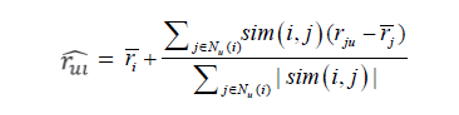

In [87]:
#neighbors_290_df.loc[15]
len(neighbors_290_df.loc[1])

30

In [88]:
neighbors_290_df.loc[1][70]

4.0

In [206]:
#weight_neighbors290
#mean_neighbors_series
#neighbors_290_df.loc[1]

In [228]:
summation_nominator = []
for itemid in item_ids:
    row = (neighbors_290_df.loc[itemid].subtract(mean_neighbors_series).multiply(weight_neighbors290)).sum()
    summation_nominator.append(row)
summation_nominator_series = pd.Series(summation_denominator, index = item_ids)
summation_nominator_series

1       5.535021
15      0.339770
21     -2.043500
22      6.848592
28      4.891819
          ...   
1060   -1.751197
1079   -2.240678
1091   -3.676907
1285    0.000000
1336   -2.575649
Length: 150, dtype: float64

In [226]:
# Testing

row_15 = neighbors_290_df.loc[21]

diff = row_15.subtract(mean_neighbors_series)
(diff.multiply(weight_neighbors290)).sum()


-2.0435002033419845

In [281]:
#Testing
list_of_rows = []
for itemid in item_ids:
    row = neighbors_290_df.loc[itemid]
    l = []
    for userid in neighbor_user_ids:
        if neighbors_290_df.loc[itemid].isnull()[userid] == False:
            l.append(userid)
    list_of_rows.append(l)
    
summation_denominator = []
for i in range(150):
    l = list_of_rows[i]
    s = weight_neighbors290[l].sum()
    summation_denominator.append(s)

summation_denominator_series = pd.Series(summation_denominator, index = item_ids)
summation_denominator_series

1       10.231947
15       6.272509
21       2.654541
22      10.320950
28      11.435796
          ...    
1060     1.458489
1079     1.382215
1091     3.391024
1285     0.000000
1336     1.036700
Length: 150, dtype: float64

In [275]:
#testing
weight_neighbors290[list_of_rows[2]].sum()

10.231947177644823

In [294]:
pred = mean_290 + summation_nominator_series/summation_denominator_series
pred.sort_values(ascending = False).head(10)

174    4.340551
50     4.297746
172    4.256123
318    4.245133
64     4.236880
181    4.166434
98     4.043595
22     4.016896
651    3.990893
496    3.957939
dtype: float64

In [290]:
neighbors_290_df.loc[1285]

user_id
70    NaN
901   NaN
275   NaN
497   NaN
536   NaN
514   NaN
896   NaN
506   NaN
178   NaN
882   NaN
807   NaN
298   NaN
311   NaN
545   NaN
267   NaN
405   NaN
130   NaN
254   NaN
682   NaN
484   NaN
618   NaN
200   NaN
378   NaN
222   NaN
716   NaN
56    NaN
886   NaN
64    NaN
577   NaN
87    NaN
Name: 1285, dtype: float64

In [ ]:
# definin a function that selects movies(items_id) that have at least 10 ratings

def movie_ratings(df):
    count_nonzeros_list = []
    for i in range(len(df)):
        row = df.iloc[i]
        count_nonzeros = 0
        for col_name in column_num290:
            if row[col_name] != 0:
                count_nonzeros += 1
        count_nonzeros_list.append(count_nonzeros)
    l = pd.Series(count_nonzeros_list, index = n_index)
    return l

In [ ]:
movie_ratings(neighborsmat_290_fillna)

In [ ]:
# Getting movies with at least 10 ratings
rates = movie_ratings(neighborsmat_290_fillna)
m = []
for i in n_index:
    if rates[i]>10:
        m.append(i)
m

In [ ]:
rates.index

In [ ]:
# lets check the last 10 rows 
last_10row = neighborsmat_290_fillna.tail(10)
last_10row.loc[1681]

In [ ]:
for i in range(neighborsmat_290_fillna):
        row = neighborsmat.iloc[i]
        for col_name in column_num290:
            if row[col_name] != 0:
                print(row)

In [ ]:
neighborsmat_290_fillna.columns

In [ ]:
column_num290 = neighborsmat_290_fillna.columns.tolist()
len(column_num290)

In [ ]:
len(weight_290)

In [ ]:
for j in range(1682):
    row = neighborsmat_290_fillna.iloc[j]


In [ ]:

neighborsmat_290.iloc[1680]

In [ ]:
sum_weight_290 = []
for j in range(1683):
    row = neighborsmat_290_fillna.iloc[j]
    row_weight = []
    for i in column_num290:  
        if row[i] != 0:
            row_weight.append(weight_290[i])
    sum_weight_290.append(pd.Series(row_weight).sum())

In [ ]:
# the nominator of the pred equation above
def one_row_diff(df,index):
    sum_weight = []
    row = df.iloc[index]
    for i in column_num290:
        if row[i] != 0:
            s= (row[i] - mean_rating_neighbors[i])*weight_290[i]
            sum_weight.append(s)
    sum_weight_series = pd.Series(sum_weight).sum()
    return sum_weight_series

In [ ]:
weight_factor =[]
for j in range(100):
    weight_factor.append(one_row_diff(df,j))

In [ ]:
normalized_value = pd.Series(weight_factor)/pd.Series(sum_weight_3712) +4.5
normalized_value

In [ ]:
#neighborsmat_290_fillna

In [ ]:
# lets test if we got the right users, so we are going to investigate if user 1 has at least 40 items in common with user 290
# the answer is yesssss

c = movielens[movielens['user_id']== 44]['item_id'].tolist()
h = set(b1).intersection(c)
len(h)

In [ ]:
len(movielens[movielens['user_id']== 44][['item_id', 'user_id']].sort_values(by = 'item_id',ascending = True)) # rated 151 items and 74 in common with user 290

In [ ]:
intersect = set(b1).intersection(c)


In [ ]:
# lets see which ones they have in common
m = movielens[movielens['user_id']== 44][['item_id', 'user_id']].sort_values(by = 'item_id',ascending = True)

In [ ]:
#b.merge(m, on = 'item_id')


In [ ]:
#name of the user_id
#column_names
#c = movielens[movielens['user_id']== 451]['item_id'].tolist()   # list of all movies(item_ids) that user_id rated

In [ ]:
#neighbors_290_test = common_users.corr()[290].sort_values(ascending =False).head(31)
#neighbors_290_test

In [ ]:
#neighborsmat_290_fillna.iloc[0]

In [ ]:
#column_num290

In [ ]:
neighborsmat_290_fillna

In [ ]:
weight_290